In [255]:
import pandas as pd

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
import sqlite3

In [258]:
con = sqlite3.connect(r'C:\Users\kpswe\Downloads\Kumud_Study\Zomato/zomato_rawdata.sqlite')

In [259]:
df = pd.read_sql_query("select * from users",con)

# Missing Values

In [260]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [261]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [262]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [263]:
df ['rate']= df['rate'].replace(('NEW','-'),np.nan)

In [264]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [265]:
'3.8/5'.split('/')[0]

'3.8'

In [266]:
type('3.8/5'.split('/')[0])

str

In [267]:
float('3.8/5'.split('/')[0])

3.8

In [268]:
df['rate'].apply(lambda x:float(x.split('/')[0]) if type(x) == str else x)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [269]:
df['rate'] = df['rate'].apply(lambda x:float(x.split('/')[0]) if type(x) == str else x)

In [270]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

## online oreder and rating

In [271]:
rate_vs_eorder = pd.crosstab(df['rate'], df['online_order'])

In [272]:
rate_vs_eorder

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

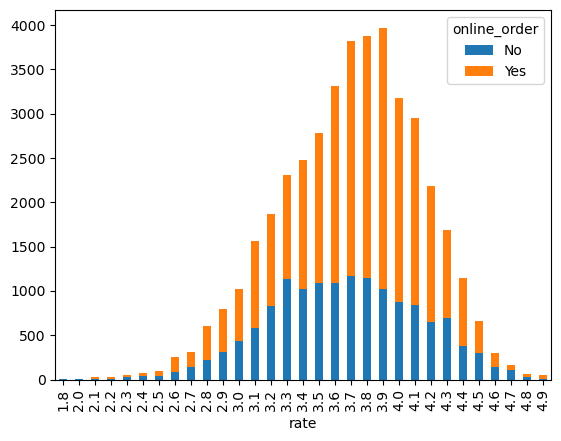

In [273]:
rate_vs_eorder.plot(kind = 'bar', stacked = True)

In [274]:
rate_vs_eorder.sum(axis=0)

online_order
No     14459
Yes    27206
dtype: int64

In [275]:
rate_vs_eorder.sum(axis=1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [276]:
rate_vs_eorder.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [277]:
customized_df = rate_vs_eorder.div(rate_vs_eorder.sum(axis=1).astype(float), axis=0)*100

<Axes: xlabel='rate'>

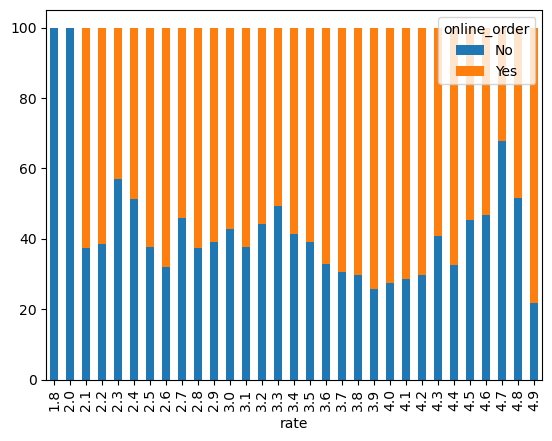

In [278]:
customized_df.plot(kind = 'bar', stacked = True)

## Data Cleaning and unigram analysis

In [279]:
df['rest_type'].isnull().sum()

227

In [280]:
rest_data = df.dropna(subset=['rest_type'])

In [281]:
rest_data['rest_type'].isnull().sum()

0

In [282]:
rest_data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [283]:
s=[rest_data['rest_type'].unique()]
s

[array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Beverage Shop, Quick Bites', 'Confectionery',
        'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
        'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
        'Food Truck', 'Quick Bites, Dessert Parlor',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
        'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
        'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
        'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
        'Casual Dining, P

In [284]:
rest_data[rest_data['rest_type'].str.contains('Beverage Shop')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
81,81,https://www.zomato.com/bangalore/frozen-bottle...,"2477, 24th Cross Road, Siddanna Layout, Stage ...",Frozen Bottle,Yes,No,4.2,146,080 48664811,Banashankari,Beverage Shop,"Berryblast, Waffles, Cheesecake, Salted Caramel","Beverages, Desserts, Ice Cream",400,"[('Rated 4.0', 'RATED\n Try this place for so...",[],Delivery,Banashankari
133,133,https://www.zomato.com/bangalore/swathi-cool-p...,"2/1, 7th Main, Dwarakangar, Banashankari, Bang...",Swathi Cool Point,No,No,NaN,0,+91 9480356851,Banashankari,Beverage Shop,None,"Beverages, Juices",200,[],[],Delivery,Banashankari
134,134,https://www.zomato.com/bangalore/kaumudis-juoi...,"487, Cauvery Complex, S.B.M Colony, 80 Feet Ro...",Kaumudis Juoice,No,No,NaN,0,+91 7829662162,Banashankari,"Beverage Shop, Quick Bites",None,"Beverages, Fast Food, Juices",150,"[('Rated 5.0', ""RATED\n Excellent sandwich so...",[],Delivery,Banashankari
141,141,https://www.zomato.com/bangalore/swaada-health...,"617, 100 Feet Ring Road Next to Devegowda Petr...",Swaada Healthy Kitchen,No,No,NaN,0,+91 9964218383,Banashankari,"Quick Bites, Beverage Shop",None,"Healthy Food, Juices, Sandwich",350,[],[],Delivery,Banashankari
157,157,https://www.zomato.com/bangalore/lassi-shop-1-...,"Dayanand Sagar College Road, Kumaraswamy Layou...",Lassi Shop,Yes,No,3.9,169,+91 7975669805,Kumaraswamy Layout,Beverage Shop,None,"Beverages, Juices, Ice Cream",150,"[('Rated 3.0', ""RATED\n Lassi's are something...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,51258,https://www.zomato.com/bangalore/masala-chai-1...,"G05 Brigade Metropolis, Gorudacharpalya, White...",Masala Chai,Yes,No,4.1,196,080 49545043\n+91 8073696078,Whitefield,"Beverage Shop, Quick Bites","Masala Chai, Sandwiches, Samosa, Masala Tea, I...","Beverages, Fast Food, Tea",250,"[('Rated 5.0', ""RATED\n I have been to masala...","['Masala Maggi', 'Sabudana Khichdi', 'Sabudana...",Dine-out,Whitefield
51279,51279,https://www.zomato.com/bangalore/chai-point-5-...,"Lower Ground Floor, Pheonix Market City, White...",Chai Point,No,No,3.8,45,+91 8880141000,Whitefield,"Beverage Shop, Quick Bites","Ginger Tea, Banana Cake, Green Tea, Veg Puff, ...","Beverages, Fast Food",150,"[('Rated 4.0', ""RATED\n Visit date - 27/9/201...",[],Dine-out,Whitefield
51291,51291,https://www.zomato.com/bangalore/fresh-berriz-...,"62, Prestige Ozone, Whitefield, Bangalore",Fresh Berriz,No,No,3.3,7,+91 7619404268\n+91 9986787761,Whitefield,Beverage Shop,None,"Beverages, Juices",250,"[('Rated 4.5', 'RATED\n I and my kids walked ...",[],Dine-out,Whitefield
51613,51613,https://www.zomato.com/bangalore/lassi-xpress-...,"107, First Floor, Arun complex, Next to Hotel ...",Lassi Xpress,No,No,3.4,7,+91 8867200836,"ITPL Main Road, Whitefield",Beverage Shop,None,"Beverages, Sandwich, Desserts",200,"[('Rated 5.0', 'RATED\n excellent'), ('Rated ...",[],Dine-out,Whitefield


In [285]:
beverage_shop_df = rest_data[rest_data['rest_type'].str.contains('Beverage Shop')]

In [286]:
beverage_shop_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [287]:
beverage_shop_df['reviews_list']

81       [('Rated 4.0', 'RATED\n  Try this place for so...
133                                                     []
134      [('Rated 5.0', "RATED\n  Excellent sandwich so...
141                                                     []
157      [('Rated 3.0', "RATED\n  Lassi's are something...
                               ...                        
51258    [('Rated 5.0', "RATED\n  I have been to masala...
51279    [('Rated 4.0', "RATED\n  Visit date - 27/9/201...
51291    [('Rated 4.5', 'RATED\n  I and my kids walked ...
51613    [('Rated 5.0', 'RATED\n  excellent'), ('Rated ...
51637    [('Rated 3.0', 'RATED\n  the sandwich was not ...
Name: reviews_list, Length: 1471, dtype: object

In [288]:
beverage_shop_df['reviews_list'] = beverage_shop_df['reviews_list'].apply(lambda x: x.lower())

C:\Users\kpswe\AppData\Local\Temp\ipykernel_15748\809719662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beverage_shop_df['reviews_list'] = beverage_shop_df['reviews_list'].apply(lambda x: x.lower())


In [289]:
from nltk.corpus import RegexpTokenizer

In [290]:
token = RegexpTokenizer('[a-zA-Z]+')

In [291]:
beverage_shop_df['reviews_list']

81       [('rated 4.0', 'rated\n  try this place for so...
133                                                     []
134      [('rated 5.0', "rated\n  excellent sandwich so...
141                                                     []
157      [('rated 3.0', "rated\n  lassi's are something...
                               ...                        
51258    [('rated 5.0', "rated\n  i have been to masala...
51279    [('rated 4.0', "rated\n  visit date - 27/9/201...
51291    [('rated 4.5', 'rated\n  i and my kids walked ...
51613    [('rated 5.0', 'rated\n  excellent'), ('rated ...
51637    [('rated 3.0', 'rated\n  the sandwich was not ...
Name: reviews_list, Length: 1471, dtype: object

In [292]:
token.tokenize(beverage_shop_df['reviews_list'][157])

['rated',
 'rated',
 'n',
 'lassi',
 's',
 'are',
 'something',
 'that',
 'are',
 'not',
 'made',
 'everywhere',
 'might',
 'be',
 'better',
 'than',
 'other',
 'outlets',
 'but',
 'not',
 'the',
 'same',
 'as',
 'the',
 'lassi',
 'we',
 'get',
 'in',
 'iconic',
 'outlets',
 'its',
 'just',
 'one',
 'of',
 'the',
 'outlet',
 'of',
 'a',
 'big',
 'chain',
 'rated',
 'rated',
 'n',
 'i',
 'ordered',
 'for',
 'a',
 'nutella',
 'brownie',
 'ice',
 'cream',
 'and',
 'was',
 'really',
 'disappointed',
 'n',
 'nthe',
 'brownie',
 'that',
 'they',
 'gave',
 'was',
 'a',
 'normal',
 'plum',
 'cake',
 'with',
 'the',
 'resin',
 'and',
 'all',
 'like',
 'srsly',
 'n',
 'nand',
 'the',
 'nutella',
 'was',
 'concentrated',
 'to',
 'one',
 'side',
 'which',
 'made',
 'it',
 'really',
 'sweet',
 'at',
 'that',
 'side',
 'n',
 'nand',
 'the',
 'ice',
 'cream',
 'was',
 'as',
 'much',
 'a',
 'teaspoon',
 'n',
 'nall',
 'of',
 'which',
 'became',
 'a',
 'huge',
 'mess',
 'n',
 'npeace']

In [293]:
review_tokens = beverage_shop_df['reviews_list'].apply(token.tokenize)

In [294]:
review_tokens

81       [rated, rated, n, try, this, place, for, some,...
133                                                     []
134      [rated, rated, n, excellent, sandwich, so, muc...
141                                                     []
157      [rated, rated, n, lassi, s, are, something, th...
                               ...                        
51258    [rated, rated, n, i, have, been, to, masala, c...
51279    [rated, rated, n, visit, date, n, nchai, is, m...
51291    [rated, rated, n, i, and, my, kids, walked, to...
51613    [rated, rated, n, excellent, rated, rated, n, ...
51637    [rated, rated, n, the, sandwich, was, not, upt...
Name: reviews_list, Length: 1471, dtype: object

In [295]:
from nltk.corpus import stopwords

In [296]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [297]:
my_stopwords = stopwords.words('english')

In [298]:
my_stopwords.extend(['rated','RATED', 'n', 'nan', 'x', 'Rated'])

In [299]:
my_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [300]:
review_157 = review_tokens[157]
print(review_157)

['rated', 'rated', 'n', 'lassi', 's', 'are', 'something', 'that', 'are', 'not', 'made', 'everywhere', 'might', 'be', 'better', 'than', 'other', 'outlets', 'but', 'not', 'the', 'same', 'as', 'the', 'lassi', 'we', 'get', 'in', 'iconic', 'outlets', 'its', 'just', 'one', 'of', 'the', 'outlet', 'of', 'a', 'big', 'chain', 'rated', 'rated', 'n', 'i', 'ordered', 'for', 'a', 'nutella', 'brownie', 'ice', 'cream', 'and', 'was', 'really', 'disappointed', 'n', 'nthe', 'brownie', 'that', 'they', 'gave', 'was', 'a', 'normal', 'plum', 'cake', 'with', 'the', 'resin', 'and', 'all', 'like', 'srsly', 'n', 'nand', 'the', 'nutella', 'was', 'concentrated', 'to', 'one', 'side', 'which', 'made', 'it', 'really', 'sweet', 'at', 'that', 'side', 'n', 'nand', 'the', 'ice', 'cream', 'was', 'as', 'much', 'a', 'teaspoon', 'n', 'nall', 'of', 'which', 'became', 'a', 'huge', 'mess', 'n', 'npeace']


In [301]:
print([word for word in review_157 if word not in my_stopwords])

['lassi', 'something', 'made', 'everywhere', 'might', 'better', 'outlets', 'lassi', 'get', 'iconic', 'outlets', 'one', 'outlet', 'big', 'chain', 'ordered', 'nutella', 'brownie', 'ice', 'cream', 'really', 'disappointed', 'nthe', 'brownie', 'gave', 'normal', 'plum', 'cake', 'resin', 'like', 'srsly', 'nand', 'nutella', 'concentrated', 'one', 'side', 'made', 'really', 'sweet', 'side', 'nand', 'ice', 'cream', 'much', 'teaspoon', 'nall', 'became', 'huge', 'mess', 'npeace']


In [302]:
review_tokens_clean = review_tokens.apply(lambda each_review: [word for word in each_review if word not in my_stopwords])

In [303]:
review_tokens_clean

81       [try, place, good, milkshakes, ice, cream, jar...
133                                                     []
134      [excellent, sandwich, much, underrated, friend...
141                                                     []
157      [lassi, something, made, everywhere, might, be...
                               ...                        
51258    [masala, chai, many, times, like, perfect, cha...
51279    [visit, date, nchai, mandatory, f, shopping, p...
51291    [kids, walked, food, court, order, mock, tails...
51613    [excellent, good, lassi, weeks, back, within, ...
51637                       [sandwich, upto, expectations]
Name: reviews_list, Length: 1471, dtype: object

### convert this series into 1D list for unigram analysis

In [304]:
total_reviews_2D = list(review_tokens_clean)

In [305]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [306]:
total_reviews_1D

['try',
 'place',
 'good',
 'milkshakes',
 'ice',
 'cream',
 'jar',
 'newly',
 'introduced',
 'waffles',
 'perfect',
 'place',
 'visit',
 'evening',
 'late',
 'night',
 'nutty',
 'chocolate',
 'best',
 'amongst',
 'shakes',
 'ordering',
 'zomato',
 'complaints',
 'till',
 'seating',
 'arrangements',
 'outlets',
 'would',
 'make',
 'perfect',
 'place',
 'outlet',
 'frozen',
 'bottle',
 'visit',
 'enjoy',
 'tried',
 'almost',
 'shakes',
 'icecreams',
 'try',
 'scoops',
 'got',
 'try',
 'new',
 'addition',
 'waffles',
 'waffles',
 'perfectly',
 'crispy',
 'sweet',
 'decent',
 'amount',
 'chocolate',
 'sauce',
 'toppings',
 'benches',
 'quite',
 'attractive',
 'nmy',
 'rating',
 'nservice',
 'nfood',
 'nambience',
 'best',
 'place',
 'milkshakes',
 'keventers',
 'price',
 'pocket',
 'friendly',
 'get',
 'icecreams',
 'forget',
 'try',
 'caramel',
 'icecream',
 'one',
 'amazing',
 'thing',
 'excellent',
 'sandwich',
 'much',
 'underrated',
 'friendly',
 'environment',
 'juices',
 'good',
 '

In [307]:
from nltk import FreqDist

In [308]:
fd = FreqDist()

In [309]:
for word in total_reviews_1D:
    fd[word]= fd[word]+1

In [310]:
fd.most_common(20)

[('good', 6547),
 ('place', 6259),
 ('shake', 3062),
 ('taste', 3036),
 ('tea', 2736),
 ('shakes', 2453),
 ('try', 2394),
 ('ordered', 2206),
 ('one', 2153),
 ('juice', 2003),
 ('food', 1939),
 ('really', 1790),
 ('chai', 1776),
 ('like', 1765),
 ('also', 1729),
 ('milkshake', 1725),
 ('great', 1706),
 ('chocolate', 1696),
 ('ice', 1660),
 ('time', 1650)]

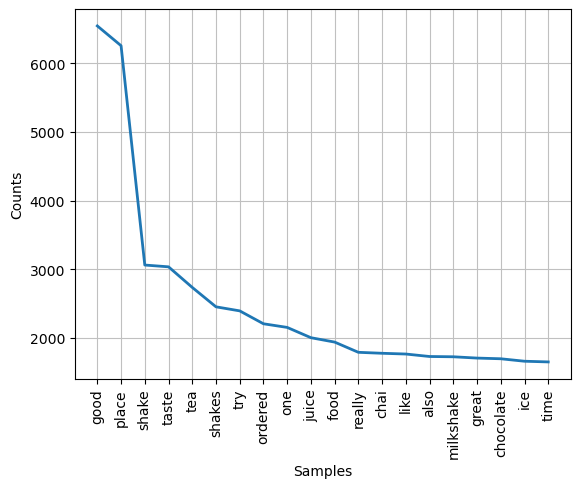

<Axes: xlabel='Samples', ylabel='Counts'>

In [311]:
fd.plot(20)

### bi-gram and tri-gram analysis

In [312]:
from nltk import FreqDist, bigrams, trigrams

In [313]:
bigrams(total_reviews_1D)

<generator object bigrams at 0x000001A2200DE5E0>

In [314]:
bi_grams=bigrams(total_reviews_1D)

In [315]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [316]:
fd_bigrams.most_common(20)

[(('ice', 'cream'), 1142),
 (('must', 'try'), 740),
 (('f', 'f'), 477),
 (('thick', 'shakes'), 446),
 (('chai', 'point'), 399),
 (('good', 'place'), 396),
 (('cold', 'coffee'), 373),
 (('milk', 'shake'), 358),
 (('ginger', 'tea'), 345),
 (('really', 'good'), 327),
 (('ice', 'creams'), 322),
 (('taste', 'good'), 308),
 (('oreo', 'shake'), 305),
 (('value', 'money'), 268),
 (('first', 'time'), 266),
 (('one', 'best'), 261),
 (('also', 'good'), 259),
 (('good', 'good'), 258),
 (('nice', 'place'), 258),
 (('visit', 'place'), 256)]

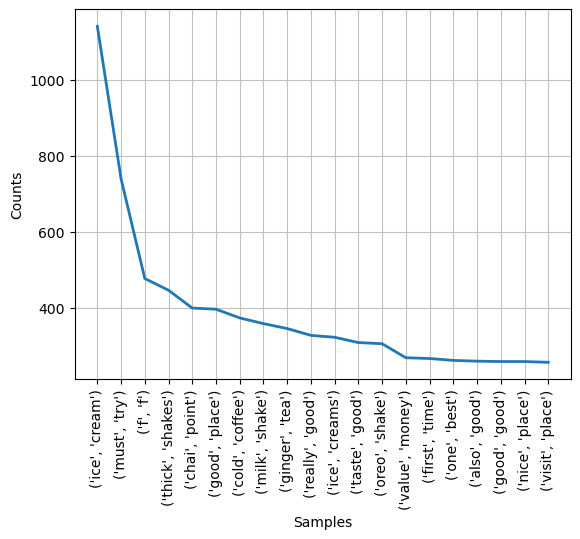

<Axes: xlabel='Samples', ylabel='Counts'>

In [317]:
fd_bigrams.plot(20)

In [318]:
tri_grams = trigrams(total_reviews_1D)

In [319]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [320]:
fd_trigrams.most_common(20)

[(('f', 'f', 'f'), 209),
 (('vanilla', 'ice', 'cream'), 104),
 (('f', 'c', 'f'), 101),
 (('c', 'f', 'f'), 87),
 (('paneer', 'butter', 'masala'), 70),
 (('must', 'visit', 'place'), 63),
 (('tea', 'ginger', 'tea'), 63),
 (('must', 'try', 'place'), 61),
 (('good', 'good', 'good'), 61),
 (('ice', 'cream', 'good'), 60),
 (('salad', 'ice', 'cream'), 57),
 (('dry', 'fruit', 'lassi'), 56),
 (('would', 'recommend', 'place'), 56),
 (('place', 'hangout', 'friends'), 54),
 (('food', 'taste', 'good'), 54),
 (('wrong', 'order', 'delivered'), 54),
 (('ferrero', 'rocher', 'shake'), 53),
 (('fruit', 'salad', 'ice'), 53),
 (('f', 'f', 'c'), 52),
 (('f', 'b', 'f'), 52)]

## Extract Geographical Data

In [321]:
!pip install geocoder

In [322]:
!pip install geopy

In [323]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [324]:
df_copy = df

In [325]:
df_copy['location']= df_copy['location'] + ' , Bangalore , Karnataka , India '

In [326]:
df_copy['location'].unique()

array(['Banashankari , Bangalore , Karnataka , India ',
       'Basavanagudi , Bangalore , Karnataka , India ',
       'Mysore Road , Bangalore , Karnataka , India ',
       'Jayanagar , Bangalore , Karnataka , India ',
       'Kumaraswamy Layout , Bangalore , Karnataka , India ',
       'Rajarajeshwari Nagar , Bangalore , Karnataka , India ',
       'Vijay Nagar , Bangalore , Karnataka , India ',
       'Uttarahalli , Bangalore , Karnataka , India ',
       'JP Nagar , Bangalore , Karnataka , India ',
       'South Bangalore , Bangalore , Karnataka , India ',
       'City Market , Bangalore , Karnataka , India ',
       'Nagarbhavi , Bangalore , Karnataka , India ',
       'Bannerghatta Road , Bangalore , Karnataka , India ',
       'BTM , Bangalore , Karnataka , India ',
       'Kanakapura Road , Bangalore , Karnataka , India ',
       'Bommanahalli , Bangalore , Karnataka , India ', nan,
       'CV Raman Nagar , Bangalore , Karnataka , India ',
       'Electronic City , Bangalore , 

In [327]:
df_copy['location'].isnull().sum()

21

In [328]:
df_copy = df_copy.dropna(subset=['location'])

In [329]:
df_copy['location'].isnull().sum()

0

In [330]:
locations = pd.DataFrame(df_copy['location'].unique())

In [331]:
locations.columns = ['name']

In [332]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [333]:
from geopy.geocoders import Nominatim

In [334]:
Nominatim(user_agent='app', timeout=None)

In [335]:
geolocator =Nominatim(user_agent='app', timeout=None)

In [336]:
lat=[]
long=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None :
        lat.append(np.nan)
        long.append(np.nan)
    else:
        lat.append(location.latitude)
        long.append(location.longitude)

In [337]:
locations['latitude']=lat
locations['longitude']=long

In [338]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.960381,77.557009
3,"Jayanagar , Bangalore , Karnataka , India",12.939904,77.582638
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009652,77.553054
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.107915,77.585524
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [339]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [342]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [343]:
locations['latitude'][79] = 13.0163
locations['longitude'][79]= 77.6785
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

C:\Users\kpswe\AppData\Local\Temp\ipykernel_15748\4111536580.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  locations['latitude'][79] = 13.0163
C:\Users\kpswe\AppData\Local\Temp\ipykernel_15748\4111536580.py:1: SettingWithCopyWarning: 


In [344]:
locations[locations['latitude'].isna()]

,name,latitude,longitude


In [345]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.960381,77.557009
3,"Jayanagar , Bangalore , Karnataka , India",12.939904,77.582638
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009652,77.553054
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.107915,77.585524
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [347]:
df['cuisines'].isnull().sum()

45

In [348]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [ ]:
#north_india = df[df.dropna(subset = ['cuisines']).str.contains('North Indian')]

In [349]:
north_india = df[df['cuisines'].str.contains('North Indian', na=False)]

In [350]:
north_india

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari , Bangalore , Karnataka , India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore , Karnataka , India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi , Bangalore , Karnataka , India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield , Bangalore , Karnataka , India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield , Bangalore , Karnataka , India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield , Bangalore , Karnataka , India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield , Bangalore , Karnataka , India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [351]:
north_india['location'].value_counts()

location
BTM , Bangalore , Karnataka , India                   2469
HSR , Bangalore , Karnataka , India                   1123
Whitefield , Bangalore , Karnataka , India            1059
Marathahalli , Bangalore , Karnataka , India          1038
JP Nagar , Bangalore , Karnataka , India               958
                                                      ... 
Hebbal , Bangalore , Karnataka , India                   4
Jakkur , Bangalore , Karnataka , India                   3
Central Bangalore , Bangalore , Karnataka , India        2
West Bangalore , Bangalore , Karnataka , India           1
Peenya , Bangalore , Karnataka , India                   1
Name: count, Length: 90, dtype: int64

In [364]:
north_india_count = north_india['location'].value_counts().reset_index()

In [373]:
north_india_count = north_india_count.rename(columns={'location' : 'name'})

In [374]:
north_india_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , In...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [375]:
heatmap_df = north_india_count.merge(locations, on = 'name', how = 'left')

In [376]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.916360,77.604733
1,"HSR , Bangalore , Karnataka , India",1123,12.900563,77.649475
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , In...",2,12.973393,77.611247
88,"West Bangalore , Bangalore , Karnataka , India",1,13.009652,77.553054


In [379]:
!pip install folium
import folium

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   -------------- ------------------------ 41.0/108.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 108.9/108.9 kB 2.1 MB/s eta 0:00:00


In [380]:
basemap = folium.Map()

In [381]:
basemap

In [382]:
from folium.plugins import HeatMap

In [383]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [385]:
HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)

In [388]:
basemap

# automate the task by creating the function

In [400]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine, na=False)]
    cuisine_df_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'location' : 'name'})
    heatmap_df = cuisine_df_rest_count.merge(locations, on = 'name', how = 'left')
    print(heatmap_df.head(5))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)
    return basemap

In [401]:
get_heatmap('Mexican')

                                                name  count   latitude  \
0       Indiranagar , Bangalore , Karnataka , India      42  12.996298   
1            Ulsoor , Bangalore , Karnataka , India      35  12.977879   
2  Koramangala 7th Block , Bangalore , Karnataka ...     34  12.936485   
3      Banashankari , Bangalore , Karnataka , India      32  12.939333   
4  Koramangala 5th Block , Bangalore , Karnataka ...     32  12.934843   

   longitude  
0  77.545278  
1  77.624670  
2  77.613478  
3  77.553982  
4  77.618977  
